In [96]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as LR

In [97]:
dems = pd.read_csv('../datasets/dem_candidates.csv')
fec_house = pd.read_csv('../datasets/fec-house.csv')
fec_senate = pd.read_csv('../datasets/fec-senate.csv')
fec = pd.concat([fec_house, fec_senate], ignore_index=True)

In [98]:
dems = dems.rename(columns={'Warren Endorsed? ': 'Warren Endorsed?', 'Guns Sense Candidate?': 'Gun Sense Candidate?'})
endorsement_cols = dems.columns[pd.Series(dems.columns).str.contains('Endorsed')].values
endorsement_cols = np.append(endorsement_cols, 'Gun Sense Candidate?')
endorsement_cols = np.append(endorsement_cols, 'Party Support?')
# endorsement_cols = np.append(endorsement_cols, 'Obama Alum?')
# endorsement_cols = np.append(endorsement_cols, 'No Labels Support?')
dems[endorsement_cols] = dems[endorsement_cols].replace({'No': 0, 'Yes': 1})
dems['Total Endorsements'] = dems[endorsement_cols].sum(axis=1)
dems['Endorsed'] = (dems['Total Endorsements'] > 0).astype(int)
dems['Won Primary'] = (dems['Won Primary'] == 'Yes').astype(int)
dems['Race'] = (dems['Race'] == 'Nonwhite').astype(int)
dems['Veteran?'] = (dems['Veteran?'] == 'Yes').astype(int)
dems['LGBTQ?'] = (dems['LGBTQ?'] == 'Yes').astype(int)
dems['Self-Funder?'] = (dems['Self-Funder?'] == 'Yes').astype(int)
dems['STEM?'] = (dems['STEM?'] == 'Yes').astype(int)
dems = dems[dems['Race Type'] == 'Regular']

In [99]:
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [100]:
dems.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Gun Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed?',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?',
       'Total Endorsements', 'Endorsed'],
      dtype='object')

Justice Dems (50), Our Revolution (85), WFP (30), Indivisible (46), VoteVets (28), Emily (54), PCCC (15), Party (39), Gun Sense (193)

In [101]:
endorsement_cols

array(['Emily Endorsed?', 'Biden Endorsed?', 'Warren Endorsed?',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?',
       'Indivisible Endorsed?', 'WFP Endorsed?', 'VoteVets Endorsed?',
       'Gun Sense Candidate?', 'Party Support?'], dtype=object)

In [102]:
fec.head()

,name,office,office_full,party,party_full,state,district,district_number,election_districts,election_years,...,party.1,office.1,candidate_inactive.1,individual_itemized_contributions,transfers_from_other_authorized_committee,other_political_committee_contributions,state.1,district.1,district_number.1,state_full
0,"SEWELL, TERRI A.",H,House,DEM,DEMOCRATIC PARTY,AL,7,7,"{07,07,07,07,07,07,07,07}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,314433.51,0.00,1453045.73,AL,7,7,Alabama
1,"BERA, AMERISH",H,House,DEM,DEMOCRATIC PARTY,CA,7,7,"{03,07,07,07,07,07,06,06}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,1463699.25,0.00,1193555.00,CA,7,7,California
2,"DESAULNIER, MARK",H,House,DEM,DEMOCRATIC PARTY,CA,11,11,"{10,11,11,11,11,10,10}","{2010,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,177938.55,0.00,344100.00,CA,11,11,California
3,"GARAMENDI, JOHN",H,House,DEM,DEMOCRATIC PARTY,CA,3,3,"{10,03,03,03,03,03,08,08}","{2010,2012,2014,2016,2018,2020,2022,2024}",...,DEM,H,f,346985.92,0.00,712960.30,CA,3,3,California
4,"SCHIFF, ADAM",H,House,DEM,DEMOCRATIC PARTY,CA,28,28,"{27,29,29,29,29,29,28,28,28,28,28,30,30}","{2000,2002,2004,2006,2008,2010,2012,2014,2016,...",...,DEM,H,f,2955743.08,722929.86,566750.00,CA,28,28,California


In [103]:
fec.columns

Index(['name', 'office', 'office_full', 'party', 'party_full', 'state',
       'district', 'district_number', 'election_districts', 'election_years',
       'cycles', 'candidate_status', 'incumbent_challenge',
       'incumbent_challenge_full', 'load_date', 'first_file_date',
       'last_file_date', 'last_f2_date', 'candidate_id', 'two_year_period',
       'candidate_election_year', 'address_city', 'address_state',
       'address_street_1', 'address_street_2', 'address_zip',
       'candidate_inactive', 'active_through', 'candidate_id.1',
       'election_year', 'cycle', 'is_election', 'receipts', 'disbursements',
       'cash_on_hand_end_period', 'debts_owed_by_committee',
       'coverage_start_date', 'coverage_end_date', 'federal_funds_flag',
       'has_raised_funds', 'party.1', 'office.1', 'candidate_inactive.1',
       'individual_itemized_contributions',
       'transfers_from_other_authorized_committee',
       'other_political_committee_contributions', 'state.1', 'district.1

In [358]:
fec[fec['last'] == 'mahony']

,name,office,office_full,party,party_full,state,district,district_number,election_districts,election_years,...,candidate_inactive.1,individual_itemized_contributions,transfers_from_other_authorized_committee,other_political_committee_contributions,state.1,district.1,district_number.1,state_full,first,last
313,"MAHONY, JOSH",H,House,DEM,DEMOCRATIC PARTY,AR,3,3,{03},{2018},...,f,80569.95,0.0,6000.0,AR,3,3,Arkansas,josh,mahony


In [359]:
test = fec['name'].str.lower().str.extract(', (\w+\s*\w*)')
test

,0
0,terri a
1,amerish
2,mark
3,john
4,adam
...,...
1650,james courage
1651,jenny
1652,mitchell kent
1653,maria


In [361]:
r = '({})'.format('|'.join(test[0]))
r
#merge_df = df2.Domain.str.extract(r, expand=False).fillna(df2.Domain)

TypeError: sequence item 808: expected str instance, float found

In [309]:
dems['first'] = dems['Candidate'].str.lower().str.split(' ', n=1, expand=True)[0]
lastnames = dems['Candidate'].str.lower().str.split(' ', n=1, expand=True)[1].str.findall('^([a-z]*)$|(?<=[\s\t])(\w+)$|^(\w+)(?=[\s\t])').str[-1].astype(str).str.extract('(\w+)')
dems['last'] = lastnames[0]

fec['first'] = fec['name'].str.lower().str.extract(', (\w+)')[0]
fec['last'] = fec['name'].str.lower().str.extract('(\w+\s*)')[0]

merged = pd.merge(dems, fec, how='left', left_on=['first', 'last'], right_on=['first', 'last'])
merged = merged[merged['Office Type'] != 'Governor']
merged[merged['name'].isna()][['Candidate', 'State', 'District', 'first', 'last', 'name', 'office']].head(50)

,Candidate,State,District,first,last,name,office
13,Lee Auman,AL,U.S. House Alabama District 4,lee,auman,NaN,NaN
14,Rick Neighbors,AL,U.S. House Alabama District 4,rick,neighbors,NaN,NaN
20,Clarke Tucker,AR,U.S. House Arkansas District 2,clarke,tucker,NaN,NaN
21,Gwen Combs,AR,U.S. House Arkansas District 2,gwen,combs,NaN,NaN
24,Joshua Mahony,AR,U.S. House Arkansas District 3,joshua,mahony,NaN,NaN
41,Marty Walters,CA,U.S. House California District 1,marty,walters,NaN,NaN
42,Dotty Nygard,CA,U.S. House California District 10,dotty,nygard,NaN,NaN
45,Mike Barkley,CA,U.S. House California District 10,mike,barkley,NaN,NaN
58,Katie Hill,CA,U.S. House California District 25,katie,hill,NaN,NaN
61,Gil Cisneros,CA,U.S. House California District 39,gil,cisneros,NaN,NaN


## Inverse Propensity Weighting: Our Revolution
- Y (outcome): `'Won Primary'`
- Z (treatment): `'Our Revolution Endorsed?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'STEM?'`

In [319]:
our_rev = dems[dems['Our Revolution Endorsed?'].notnull() == True][['Won Primary', 'Our Revolution Endorsed?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'STEM?']].reset_index().drop(columns=['index'])
our_rev['Total Endorsements'] = our_rev['Total Endorsements'] - our_rev['Our Revolution Endorsed?']
our_rev.head()

,Won Primary,Our Revolution Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?
0,0,0.0,0.0,25.83,1,0,0,1
1,0,0.0,0.0,25.83,0,1,0,0
2,0,0.0,0.0,25.83,1,0,0,0
3,0,0.0,0.0,25.83,1,0,0,0
4,0,1.0,1.0,25.83,0,0,0,0


In [321]:
# creating our treatment, outcome, and confounder arrays
Z = our_rev['Our Revolution Endorsed?'].values
Y = our_rev['Won Primary'].values
X = our_rev.drop(['Our Revolution Endorsed?', 'Won Primary'], axis=1).to_numpy()

# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

# function for estimating treatment effect
def estimate_treatment_effect(model, X, Y, Z):
    return np.mean((Z * Y / model.predict_proba(X)[:, 1]) - ((1 - Z) * Y / model.predict_proba(X)[:, 0]))

estimate_treatment_effect(fit, X, Y, Z)

-0.012003258286031632

Since this is a negative number, the treatment (being endorsed by `Our Revolution`) caused the probability of winning to decrease.

In [322]:
# naive estimator from HW4, not sure if we need for this
# the naive estimator does not account for confounders!
# Interesting... once we control for confounders, we observe the opposite effect (positive to negative)
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.11162599114406344

### Adding the propensity scores

In [323]:
our_rev['pscore'] = fit.predict_proba(X)[:, 1]
our_rev.head()

,Won Primary,Our Revolution Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?,pscore
0,0,0.0,0.0,25.83,1,0,0,1,0.073804
1,0,0.0,0.0,25.83,0,1,0,0,0.026608
2,0,0.0,0.0,25.83,1,0,0,0,0.080634
3,0,0.0,0.0,25.83,1,0,0,0,0.080634
4,0,1.0,1.0,25.83,0,0,0,0,0.176953


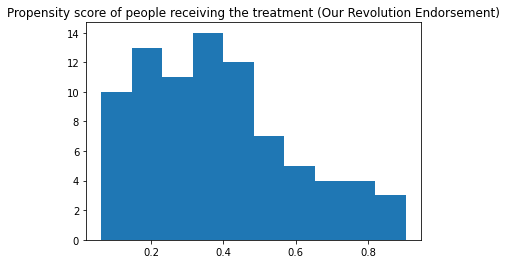

In [324]:
plt.hist(our_rev[our_rev['Our Revolution Endorsed?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Our Revolution Endorsement)");

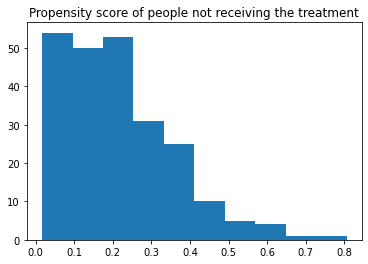

In [325]:
plt.hist(our_rev[our_rev['Our Revolution Endorsed?'] == 0]['pscore']);
plt.title("Propensity score of people not receiving the treatment");

### IPW Estimate

In [326]:
reweighted_treated = (our_rev[our_rev['Our Revolution Endorsed?'] == 1]['Won Primary'] / our_rev[our_rev['Our Revolution Endorsed?'] == 1]['pscore']).sum()
reweighted_control = (our_rev[our_rev['Our Revolution Endorsed?'] == 0]['Won Primary'] / (1 - our_rev[our_rev['Our Revolution Endorsed?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(our_rev)
ipw_estimate

-0.012003258286031595

In [327]:
obs_filt = our_rev[our_rev['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Our Revolution Endorsed?'] == 1]['Won Primary'] / obs_filt[obs_filt['Our Revolution Endorsed?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Our Revolution Endorsed?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Our Revolution Endorsed?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
trimmed_ipw_estimate

-0.05996647763948085

## Inverse Propensity Weighting: Party Support

- Y (outcome): `'Won Primary'`
- Z (treatment): `'Party Support?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'STEM?'`

In [328]:
party = dems[dems['Party Support?'].notnull() == True][['Won Primary', 'Party Support?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?', 'STEM?']].reset_index().drop(columns=['index'])
party['Total Other Endorsements'] = party['Total Endorsements'] - party['Party Support?']
party = party.drop(columns=['Total Endorsements'])
party.head()

,Won Primary,Party Support?,Partisan Lean,Race,Veteran?,LGBTQ?,Self-Funder?,STEM?,Total Other Endorsements
0,1,1.0,-13.51,0,0,0,0,0,1.0
1,0,0.0,-13.51,0,1,0,0,0,1.0
2,0,0.0,-13.51,1,0,0,0,0,0.0
3,0,0.0,-13.51,0,0,0,0,0,0.0
4,0,0.0,0.62,0,0,0,0,1,2.0


In [329]:
# creating our treatment, outcome, and confounder arrays
Z = party['Party Support?'].values
Y = party['Won Primary'].values
X = party.drop(['Party Support?', 'Won Primary'], axis=1).to_numpy()

# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

estimate_treatment_effect(fit, X, Y, Z)

0.8693583538150906

In [330]:
# the naive estimator does not account for confounders!
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.9184149184149184

### Adding the propensity scores

In [331]:
party['pscore'] = fit.predict_proba(X)[:, 1]
party.head()

,Won Primary,Party Support?,Partisan Lean,Race,Veteran?,LGBTQ?,Self-Funder?,STEM?,Total Other Endorsements,pscore
0,1,1.0,-13.51,0,0,0,0,0,1.0,0.372104
1,0,0.0,-13.51,0,1,0,0,0,1.0,0.504320
2,0,0.0,-13.51,1,0,0,0,0,0.0,0.209023
3,0,0.0,-13.51,0,0,0,0,0,0.0,0.201965
4,0,0.0,0.62,0,0,0,0,1,2.0,0.335665


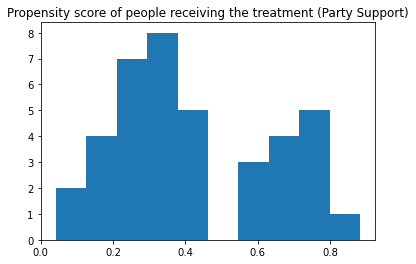

In [332]:
plt.hist(party[party['Party Support?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Party Support)");

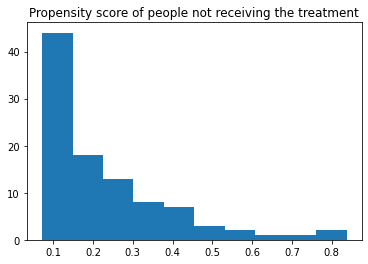

In [333]:
plt.hist(party[party['Party Support?'] == 0]['pscore']);
plt.title("Propensity score of people not receiving the treatment");

### IPW Estimate

In [334]:
reweighted_treated = (party[party['Party Support?'] == 1]['Won Primary'] / party[party['Party Support?'] == 1]['pscore']).sum()
reweighted_control = (party[party['Party Support?'] == 0]['Won Primary'] / (1 - party[party['Party Support?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(party)
print('IPW estimate:', ipw_estimate)

obs_filt = party[party['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Party Support?'] == 1]['Won Primary'] / obs_filt[obs_filt['Party Support?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Party Support?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Party Support?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
print('trimmed IPW estimate:', trimmed_ipw_estimate)

IPW estimate: 0.8693583538150904
trimmed IPW estimate: 0.7935495457385874


## Inverse Propensity Weighting: Emily's List
- Y (outcome): `'Won Primary'`
- Z (treatment): `'Emily Endorsed?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'STEM?'`

In [336]:
emily = dems[dems['Emily Endorsed?'].notnull() == True][['Won Primary', 'Emily Endorsed?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'STEM?']].reset_index().drop(columns=['index'])
emily['Total Endorsements'] = emily['Total Endorsements'] - emily['Emily Endorsed?']
emily.head()

,Won Primary,Emily Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?
0,0,0.0,2.0,0.62,0,0,0,1
1,1,0.0,2.0,0.62,0,0,0,1
2,0,0.0,0.0,0.62,0,0,0,0
3,0,0.0,0.0,0.62,0,1,0,1
4,0,0.0,0.0,0.62,0,0,0,1


In [337]:
# creating our treatment, outcome, and confounder arrays
Z = emily['Emily Endorsed?'].values
Y = emily['Won Primary'].values
X = emily.drop(['Emily Endorsed?', 'Won Primary'], axis=1).to_numpy()

# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

estimate_treatment_effect(fit, X, Y, Z)

0.5506286782549769

In [338]:
# the naive estimator does not account for confounders!
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.6360153256704981

### Adding the propensity scores

In [339]:
emily['pscore'] = fit.predict_proba(X)[:, 1]
emily.head()

,Won Primary,Emily Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?,pscore
0,0,0.0,2.0,0.62,0,0,0,1,0.327874
1,1,0.0,2.0,0.62,0,0,0,1,0.327874
2,0,0.0,0.0,0.62,0,0,0,0,0.164247
3,0,0.0,0.0,0.62,0,1,0,1,0.109998
4,0,0.0,0.0,0.62,0,0,0,1,0.168636


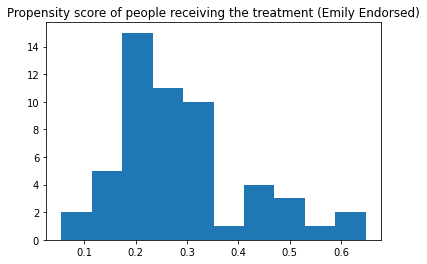

In [340]:
plt.hist(emily[emily['Emily Endorsed?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Emily Endorsed)");

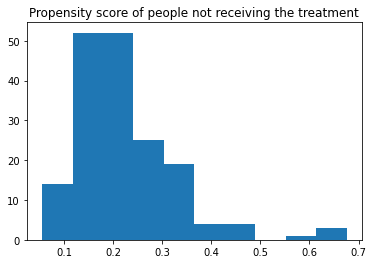

In [341]:
plt.hist(emily[emily['Emily Endorsed?'] == 0]['pscore']);
plt.title("Propensity score of people not receiving the treatment");

### IPW Estimate

In [342]:
reweighted_treated = (emily[emily['Emily Endorsed?'] == 1]['Won Primary'] / emily[emily['Emily Endorsed?'] == 1]['pscore']).sum()
reweighted_control = (emily[emily['Emily Endorsed?'] == 0]['Won Primary'] / (1 - emily[emily['Emily Endorsed?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(emily)
print('IPW estimate:', ipw_estimate)

obs_filt = emily[emily['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Emily Endorsed?'] == 1]['Won Primary'] / obs_filt[obs_filt['Emily Endorsed?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Emily Endorsed?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Emily Endorsed?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
print('trimmed IPW estimate:', trimmed_ipw_estimate)

IPW estimate: 0.5506286782549769
trimmed IPW estimate: 0.5320447067887853


## Inverse Propensity Weighting: Justice Dems
- Y (outcome): `'Won Primary'`
- Z (treatment): `'Justice Dems Endorsed?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'STEM?'`

In [343]:
jd = dems[dems['Justice Dems Endorsed?'].notnull() == True][['Won Primary', 'Justice Dems Endorsed?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'STEM?']].reset_index().drop(columns=['index'])
jd['Total Endorsements'] = jd['Total Endorsements'] - jd['Justice Dems Endorsed?']
jd.head()

,Won Primary,Justice Dems Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?
0,1,1.0,1.0,-21.379999,0,0,0,0
1,0,0.0,0.0,-21.379999,0,0,0,0
2,0,0.0,0.0,-21.379999,0,0,0,0
3,0,0.0,1.0,-21.379999,0,0,0,0
4,0,1.0,1.0,0.620000,0,0,0,1


In [344]:
# creating our treatment, outcome, and confounder arrays
Z = jd['Justice Dems Endorsed?'].values
Y = jd['Won Primary'].values
X = jd.drop(['Justice Dems Endorsed?', 'Won Primary'], axis=1).to_numpy()

# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

estimate_treatment_effect(fit, X, Y, Z)

0.050584861670352886

In [345]:
# the naive estimator does not account for confounders!
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.1404255319148936

### Adding the propensity scores

In [346]:
jd['pscore'] = fit.predict_proba(X)[:, 1]
jd.head()

,Won Primary,Justice Dems Endorsed?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?,pscore
0,1,1.0,1.0,-21.379999,0,0,0,0,0.272099
1,0,0.0,0.0,-21.379999,0,0,0,0,0.174466
2,0,0.0,0.0,-21.379999,0,0,0,0,0.174466
3,0,0.0,1.0,-21.379999,0,0,0,0,0.272099
4,0,1.0,1.0,0.620000,0,0,0,1,0.275082


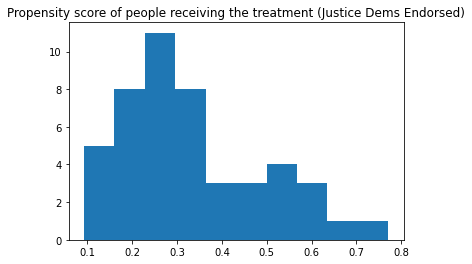

In [347]:
plt.hist(jd[jd['Justice Dems Endorsed?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Justice Dems Endorsed)");

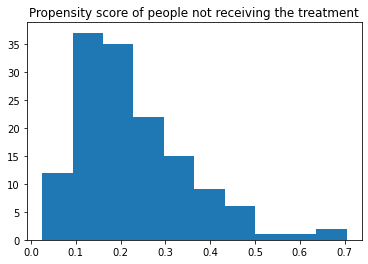

In [348]:
plt.hist(jd[jd['Justice Dems Endorsed?'] == 0]['pscore']);
plt.title("Propensity score of people not receiving the treatment");

### IPW Estimate

In [349]:
reweighted_treated = (jd[jd['Justice Dems Endorsed?'] == 1]['Won Primary'] / jd[jd['Justice Dems Endorsed?'] == 1]['pscore']).sum()
reweighted_control = (jd[jd['Justice Dems Endorsed?'] == 0]['Won Primary'] / (1 - jd[jd['Justice Dems Endorsed?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(jd)
print('IPW estimate:', ipw_estimate)

obs_filt = jd[jd['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Justice Dems Endorsed?'] == 1]['Won Primary'] / obs_filt[obs_filt['Justice Dems Endorsed?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Justice Dems Endorsed?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Justice Dems Endorsed?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
print('trimmed IPW estimate:', trimmed_ipw_estimate)

IPW estimate: 0.050584861670352914
trimmed IPW estimate: -0.007964641355111154


## Inverse Propensity Weighting: Gun Sense
- Y (outcome): `'Won Primary'`
- Z (treatment): `'Gun Sense Candidate?'`
- X (confounders): `'Total Endorsements'`, `'Partisan Lean'`, `'Race'`, `'Veteran?'`, `'LGBTQ?'`, `'STEM?'`

In [350]:
gs = dems[dems['Gun Sense Candidate?'].notnull() == True][['Won Primary', 'Gun Sense Candidate?', 'Total Endorsements', 'Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'STEM?']].reset_index().drop(columns=['index'])
gs['Total Endorsements'] = gs['Total Endorsements'] - gs['Gun Sense Candidate?']
gs.head()

,Won Primary,Gun Sense Candidate?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?
0,0,0.0,0.0,-28.879999,1,1,0,0
1,0,0.0,0.0,-28.879999,0,0,1,0
2,0,0.0,0.0,-28.879999,0,1,0,0
3,0,0.0,0.0,-28.879999,1,1,0,0
4,0,0.0,0.0,-28.879999,0,0,0,0


In [351]:
# creating our treatment, outcome, and confounder arrays
Z = gs['Gun Sense Candidate?'].values
Y = gs['Won Primary'].values
X = gs.drop(['Gun Sense Candidate?', 'Won Primary'], axis=1).to_numpy()

# getting propensity scores through logistic regression
lr = LR(penalty='none', max_iter=200, random_state=0)
fit = lr.fit(X, Z)

estimate_treatment_effect(fit, X, Y, Z)

0.2383310868732276

In [352]:
# the naive estimator does not account for confounders!
np.mean(Y[Z == 1] * Z[Z == 1]) - np.mean(Y[Z == 0] * (1 - Z[Z == 0]))

0.3031816830211121

### Adding the propensity scores


In [353]:
gs['pscore'] = fit.predict_proba(X)[:, 1]
gs.head()

,Won Primary,Gun Sense Candidate?,Total Endorsements,Partisan Lean,Race,Veteran?,LGBTQ?,STEM?,pscore
0,0,0.0,0.0,-28.879999,1,1,0,0,0.219159
1,0,0.0,0.0,-28.879999,0,0,1,0,0.378318
2,0,0.0,0.0,-28.879999,0,1,0,0,0.265001
3,0,0.0,0.0,-28.879999,1,1,0,0,0.219159
4,0,0.0,0.0,-28.879999,0,0,0,0,0.434983


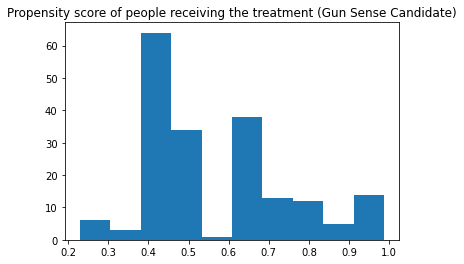

In [354]:
plt.hist(gs[gs['Gun Sense Candidate?'] == 1]['pscore']);
plt.title("Propensity score of people receiving the treatment (Gun Sense Candidate)");

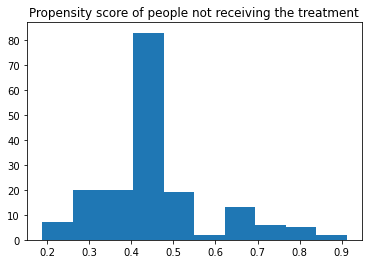

In [355]:
plt.hist(gs[gs['Gun Sense Candidate?'] == 0]['pscore']);
plt.title("Propensity score of people not receiving the treatment");

### IPW Estimate

In [356]:
reweighted_treated = (gs[gs['Gun Sense Candidate?'] == 1]['Won Primary'] / gs[gs['Gun Sense Candidate?'] == 1]['pscore']).sum()
reweighted_control = (gs[gs['Gun Sense Candidate?'] == 0]['Won Primary'] / (1 - gs[gs['Gun Sense Candidate?'] == 0]['pscore'])).sum()
ipw_estimate = (reweighted_treated - reweighted_control) / len(gs)
print('IPW estimate:', ipw_estimate)

obs_filt = gs[gs['pscore'].between(0.1, 0.9)]
reweighted_treated_filt = (obs_filt[obs_filt['Gun Sense Candidate?'] == 1]['Won Primary'] / obs_filt[obs_filt['Gun Sense Candidate?'] == 1]['pscore']).sum()
reweighted_control_filt = (obs_filt[obs_filt['Gun Sense Candidate?'] == 0]['Won Primary'] / (1 - obs_filt[obs_filt['Gun Sense Candidate?'] == 0]['pscore'])).sum()
trimmed_ipw_estimate = (reweighted_treated_filt - reweighted_control_filt) / len(obs_filt)
print('trimmed IPW estimate:', trimmed_ipw_estimate)

IPW estimate: 0.23833108687322765
trimmed IPW estimate: 0.22133287814931216
